sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  street_music


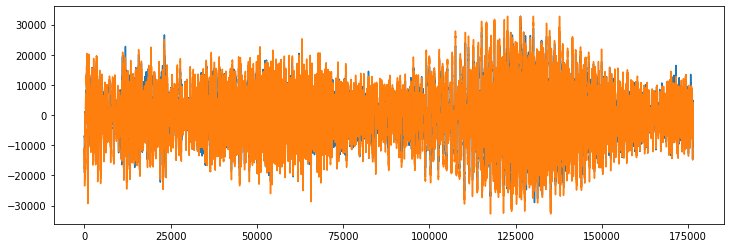

In [12]:
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import numpy as np

data = pd.read_csv("UrbanSound8K.csv")
data.shape


def path_class(filename):
    # excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('audio/SOunds/', filename)
    # return path_name, excerpt['class'].values[0]
    return path_name, filename.split(".")[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

fullpath, label = path_class('street_music.wav')
wav_plotter(fullpath,label)

+++++++++++++++++++++++
air_conditioner.wav
audio/SOunds/air_conditioner.wav
air_conditioner
sampling rate:  48000 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  192000
class:  air_conditioner
+++++++++++++++++++++++
car_horn.wav
audio/SOunds/car_horn.wav
car_horn
sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  car_horn
+++++++++++++++++++++++
children_playing.wav
audio/SOunds/children_playing.wav
children_playing
sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  children_playing
+++++++++++++++++++++++
dog_barking.wav
audio/SOunds/dog_barking.wav
dog_barking
sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  dog_barking
+++++++++++++++++++++++
drilling.wav
audio/SOunds/drilling.wav
drilling
sampling rate:  48000 Hz
bit depth:  16
number o

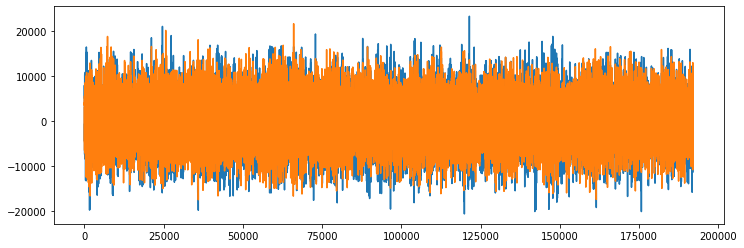

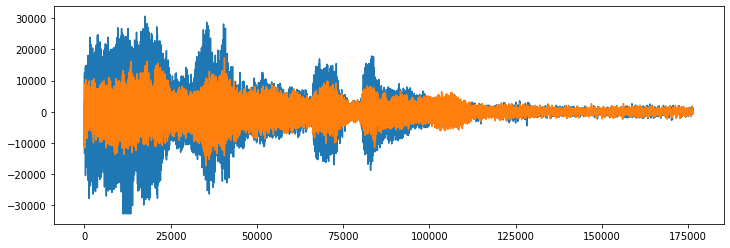

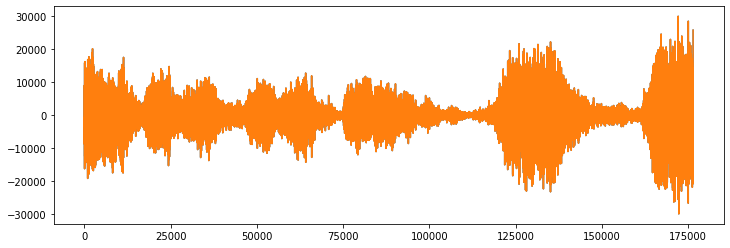

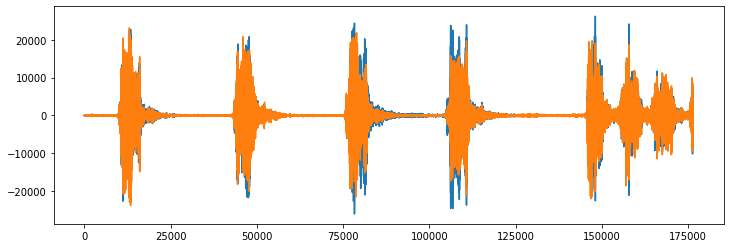

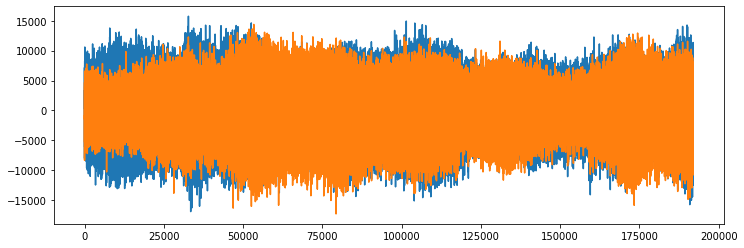

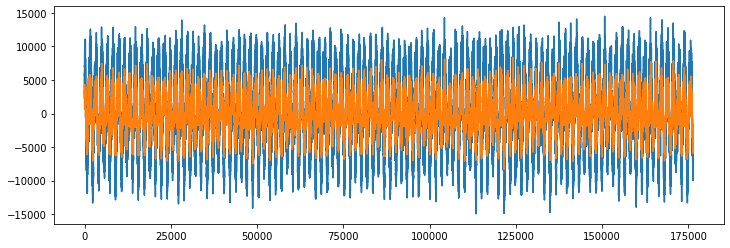

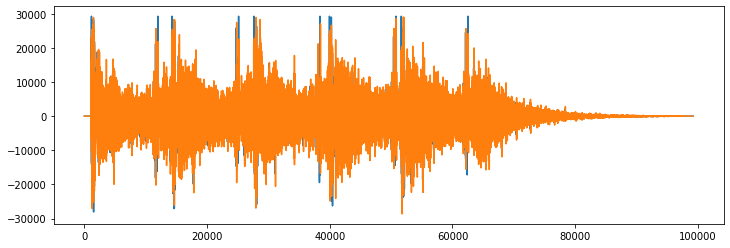

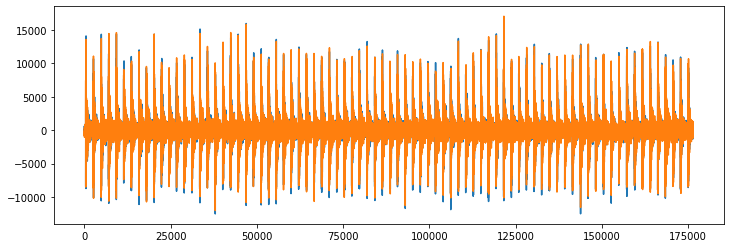

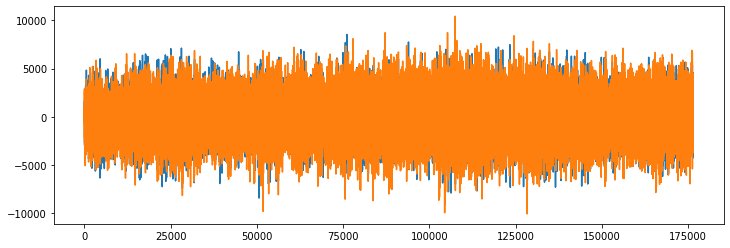

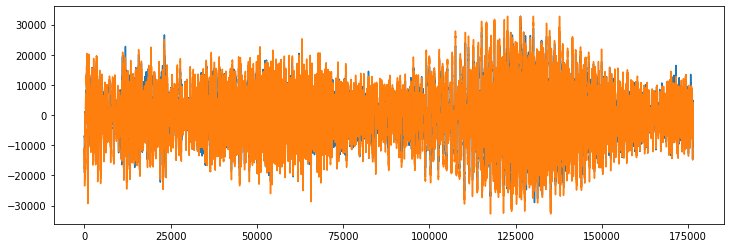

In [2]:
# Running one sample of each type in loop

import os

for file in os.listdir('audio/SOunds/'):
    print("+++++++++++++++++++++++")
    print(file)
    fullpath, label = path_class(file)
    print(fullpath)
    print(label)
    wav_plotter(fullpath,label)

In [40]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

# read csv file
metadata = pd.read_csv('UrbanSound8K.csv')

# See data
metadata.head()

# Size of data
print("Data Size: ",metadata.shape)

# Class-wise distribution of data
print("\nClass-wise distribution of data and their corresponding percentages")
print(metadata['class'].value_counts())


Data Size:  (8732, 8)

Class-wise distribution of data and their corresponding percentages
dog_bark            1000
air_conditioner     1000
children_playing    1000
engine_idling       1000
jackhammer          1000
drilling            1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


In [28]:
print(metadata['class'].value_counts(normalize=True)*100)

dog_bark            11.452130
air_conditioner     11.452130
children_playing    11.452130
engine_idling       11.452130
jackhammer          11.452130
drilling            11.452130
street_music        11.452130
siren               10.639029
car_horn             4.912964
gun_shot             4.283097
Name: class, dtype: float64


In [43]:
import pandas as pd
import os
import librosa
import librosa.display

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

wavfilehelper = WavFileHelper()


audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [47]:
# num of channels 
print("Number of audio channels")
print(audiodf.num_channels.value_counts())

Number of audio channels
2    7993
1     739
Name: num_channels, dtype: int64


In [46]:
print(audiodf.num_channels.value_counts(normalize=True)*100)

2    91.536876
1     8.463124
Name: num_channels, dtype: float64


In [56]:
print(audiodf.num_channels)

0       2
1       2
2       2
3       2
4       2
       ..
8727    2
8728    2
8729    2
8730    2
8731    2
Name: num_channels, Length: 8732, dtype: int64


In [62]:
# list of single channel audio
print(audiodf[audiodf['num_channels']==1].index.values)

[  64   65   66  107  108  109  193  194  195  257  258  262  263  264
  265  266  267  268  269  457  458  459  460  461  462  463  464  465
  466  467  468  469  470  471  472  473  474  475  476  477  478  479
  480  481  482  583  584  585  586  587  588  589  590  591  760  761
  762  763  814  815  816  817  818  819  837  838  839  840  877  878
  879  880  919  920  921  922  923  924  925  926  927  928  929  930
  995 1001 1002 1003 1004 1005 1006 1079 1080 1081 1082 1083 1084 1085
 1086 1145 1146 1147 1148 1166 1167 1168 1169 1170 1174 1175 1176 1203
 1204 1205 1206 1207 1208 1209 1210 1211 1243 1269 1270 1271 1272 1273
 1274 1275 1276 1277 1513 1536 1537 1538 1589 1590 1591 1626 1637 1749
 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763
 1764 1765 1766 1767 1768 1796 1797 1798 1799 1800 1801 1802 1839 1840
 1841 1947 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 

In [65]:
# Sampling rates
print("Sampling rates")
print(audiodf.sample_rate.value_counts())

Sampling rates
44100     5370
48000     2502
96000      610
24000       82
16000       45
22050       44
11025       39
192000      17
8000        12
11024        7
32000        4
Name: sample_rate, dtype: int64


In [67]:
print("Sampling rates")
print(audiodf.sample_rate.value_counts(normalize=True)*100)

Sampling rates
44100     61.497939
48000     28.653230
96000      6.985799
24000      0.939075
16000      0.515346
22050      0.503894
11025      0.446633
192000     0.194686
8000       0.137426
11024      0.080165
32000      0.045809
Name: sample_rate, dtype: float64


In [70]:
print("Bit Depth")

print(audiodf.bit_depth.value_counts(normalize=True)*100)

Bit Depth
16    65.941365
24    31.527714
32     1.935410
8      0.492442
4      0.103069
Name: bit_depth, dtype: float64


# FEATURE EXTRATION

In [72]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled
    
    
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'audio/'

metadata = pd.read_csv('UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  8732  files


In [77]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

# 80-20 split
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [78]:
### store the preprocessed data for use in the next notebook

%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [86]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [87]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [88]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/100
6784/6985 [============================>.] - ETA: 0s - loss: 2.2500 - accuracy: 0.2500
Epoch 00001: val_loss improved from inf to 1.96639, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 3s 419us/sample - loss: 2.2424 - accuracy: 0.2527 - val_loss: 1.9664 - val_accuracy: 0.3005
Epoch 2/100
6816/6985 [============================>.] - ETA: 0s - loss: 2.0259 - accuracy: 0.2927 ETA: 1s - loss: 2.0572 - accuracy: 
Epoch 00002: val_loss improved from 1.96639 to 1.78723, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 3s 484us/sample - loss: 2.0234 - accuracy: 0.2931 - val_loss: 1.7872 - val_accuracy: 0.4030
Epoch 3/100
6912/6985 [============================>.] - ETA: 0s - loss: 1.8587 - accuracy: 0.3490
Epoch 00003: val_loss improved from 1.78723 to 1.69766, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 

Epoch 25/100
6912/6985 [============================>.] - ETA: 0s - loss: 0.8177 - accuracy: 0.7201
Epoch 00025: val_loss improved from 0.65685 to 0.65114, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 3s 405us/sample - loss: 0.8178 - accuracy: 0.7193 - val_loss: 0.6511 - val_accuracy: 0.8088
Epoch 26/100
6880/6985 [============================>.] - ETA: 0s - loss: 0.8127 - accuracy: 0.7233
Epoch 00026: val_loss improved from 0.65114 to 0.64892, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 3s 443us/sample - loss: 0.8138 - accuracy: 0.7224 - val_loss: 0.6489 - val_accuracy: 0.8105
Epoch 27/100
6784/6985 [============================>.] - ETA: 0s - loss: 0.8008 - accuracy: 0.7285
Epoch 00027: val_loss improved from 0.64892 to 0.63803, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 2s 298us/sample - loss: 0.7982 - accuracy:

6752/6985 [===========================>..] - ETA: 0s - loss: 0.6251 - accuracy: 0.7887
Epoch 00050: val_loss did not improve from 0.50871
6985/6985 [==============================] - 2s 269us/sample - loss: 0.6228 - accuracy: 0.7893 - val_loss: 0.5134 - val_accuracy: 0.8449
Epoch 51/100
6752/6985 [===========================>..] - ETA: 0s - loss: 0.6393 - accuracy: 0.7836
Epoch 00051: val_loss did not improve from 0.50871
6985/6985 [==============================] - 2s 256us/sample - loss: 0.6390 - accuracy: 0.7843 - val_loss: 0.5100 - val_accuracy: 0.8460
Epoch 52/100
6976/6985 [============================>.] - ETA: 0s - loss: 0.6110 - accuracy: 0.7844
Epoch 00052: val_loss improved from 0.50871 to 0.50083, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 2s 276us/sample - loss: 0.6115 - accuracy: 0.7843 - val_loss: 0.5008 - val_accuracy: 0.8592
Epoch 53/100
6976/6985 [============================>.] - ETA: 0s - loss: 0.6498 - accu

6848/6985 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.8128
Epoch 00076: val_loss did not improve from 0.45049
6985/6985 [==============================] - 2s 257us/sample - loss: 0.5423 - accuracy: 0.8122 - val_loss: 0.4749 - val_accuracy: 0.8718
Epoch 77/100
6848/6985 [============================>.] - ETA: 0s - loss: 0.5584 - accuracy: 0.8070
Epoch 00077: val_loss improved from 0.45049 to 0.44678, saving model to saved_models/weights.best.basic_mlp.hdf5
6985/6985 [==============================] - 2s 333us/sample - loss: 0.5558 - accuracy: 0.8079 - val_loss: 0.4468 - val_accuracy: 0.8729
Epoch 78/100
6880/6985 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.8144
Epoch 00078: val_loss did not improve from 0.44678
6985/6985 [==============================] - 2s 288us/sample - loss: 0.5511 - accuracy: 0.8143 - val_loss: 0.4570 - val_accuracy: 0.8701
Epoch 79/100
6880/6985 [============================>.] - ETA: 0s - loss: 0.5897 - accu

# Testing the model

In [92]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.93113816
Testing Accuracy:  0.8706354


# Predictions

In [93]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [94]:
# Class: Air Conditioner

filename = 'SOunds/air_conditioner.wav' 
print_prediction(filename)

The predicted class is: air_conditioner 

air_conditioner 		 :  0.99997627735137939453125000000000
car_horn 		 :  0.00000001982584585391578002599999
children_playing 		 :  0.00000000010029471697592384771269
dog_bark 		 :  0.00000331147043652890715748071671
drilling 		 :  0.00000007781410715779202291741967
engine_idling 		 :  0.00000026864370283874450251460075
gun_shot 		 :  0.00000138652853820531163364648819
jackhammer 		 :  0.00000001204307054081255046185106
siren 		 :  0.00000035491794392328301910310984
street_music 		 :  0.00001819727367546875029802322388


In [96]:
# Class: Air Conditioner

filename = 'SOunds/engine_idling.wav' 
print_prediction(filename)

The predicted class is: engine_idling 

air_conditioner 		 :  0.00000000925885679237126169027761
car_horn 		 :  0.00000014129730629974801559001207
children_playing 		 :  0.00003352971907588653266429901123
dog_bark 		 :  0.00000513854183736839331686496735
drilling 		 :  0.00000000031105865105907071210822
engine_idling 		 :  0.99995541572570800781250000000000
gun_shot 		 :  0.00000003144502258578540931921452
jackhammer 		 :  0.00000000000023539948202505600605
siren 		 :  0.00000070699468324164627119898796
street_music 		 :  0.00000505484422319568693637847900


# CNN

In [ ]:
import numpy as np
max_pad_len = 174

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'audio/'

metadata = pd.read_csv('UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
CNN_featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(CNN_featuresdf), ' files')